# Linear Regression with Pytorch

### Linear Regression(Simple);
### y = ax + b
### y -> dependent variable(y_train, y_test)
### x -> independent variable(x_train, x_test)
### tek boyutlu(1D) egitim verisi(x) ve ogrenilecek veri old. durumdur.

### Linear Regression(Multiple);
### y = ax + ax^2 + ax^3 + ..... + b
### y -> dependent variable
### x -> independent variable
### birden cok egitim verisi(n boyutlu D)(1'den fazla train column'unun icerildigi durum), 1 boyutlu ogrenilecek veri

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable

import warnings
warnings.filterwarnings('ignore')

### Independent Variables(X_train, X_test)

In [48]:
students_examp_score_array = np.random.randint(1, 101, 20)
print(students_examp_score_array)
students_examp_score_array = students_examp_score_array.reshape(-1, 1)
print(students_examp_score_array)
students_examp_score_array = np.array(students_examp_score_array, dtype=np.float32)
print(type(students_examp_score_array), '\n', students_examp_score_array.shape)
students_examp_score_tensor = Variable(torch.from_numpy(students_examp_score_array))
print('\n', type(students_examp_score_tensor), '\n', students_examp_score_tensor.shape, '\n', students_examp_score_tensor)

[29  2 38  8 77 79 64 87 17 20 26  6  4 49 68 22 78 78 27 93]
[[29]
 [ 2]
 [38]
 [ 8]
 [77]
 [79]
 [64]
 [87]
 [17]
 [20]
 [26]
 [ 6]
 [ 4]
 [49]
 [68]
 [22]
 [78]
 [78]
 [27]
 [93]]
<class 'numpy.ndarray'> 
 (20, 1)

 <class 'torch.Tensor'> 
 torch.Size([20, 1]) 
 tensor([[29.],
        [ 2.],
        [38.],
        [ 8.],
        [77.],
        [79.],
        [64.],
        [87.],
        [17.],
        [20.],
        [26.],
        [ 6.],
        [ 4.],
        [49.],
        [68.],
        [22.],
        [78.],
        [78.],
        [27.],
        [93.]])


In [49]:
number_of_students_array = np.random.randint(1, 10, 20)
print(number_of_students_array)
number_of_students_array = np.array(number_of_students_array, dtype=np.float32).reshape(-1, 1)
print(type(number_of_students_array))
print(number_of_students_array.shape)
print(number_of_students_array)
number_of_students_tensor = Variable(torch.from_numpy(number_of_students_array))
print('\n', type(number_of_students_tensor), '\n', number_of_students_tensor.shape, '\n', number_of_students_tensor)

[8 5 5 9 9 3 2 9 2 5 9 6 5 9 7 1 3 6 5 2]
<class 'numpy.ndarray'>
(20, 1)
[[8.]
 [5.]
 [5.]
 [9.]
 [9.]
 [3.]
 [2.]
 [9.]
 [2.]
 [5.]
 [9.]
 [6.]
 [5.]
 [9.]
 [7.]
 [1.]
 [3.]
 [6.]
 [5.]
 [2.]]

 <class 'torch.Tensor'> 
 torch.Size([20, 1]) 
 tensor([[8.],
        [5.],
        [5.],
        [9.],
        [9.],
        [3.],
        [2.],
        [9.],
        [2.],
        [5.],
        [9.],
        [6.],
        [5.],
        [9.],
        [7.],
        [1.],
        [3.],
        [6.],
        [5.],
        [2.]])


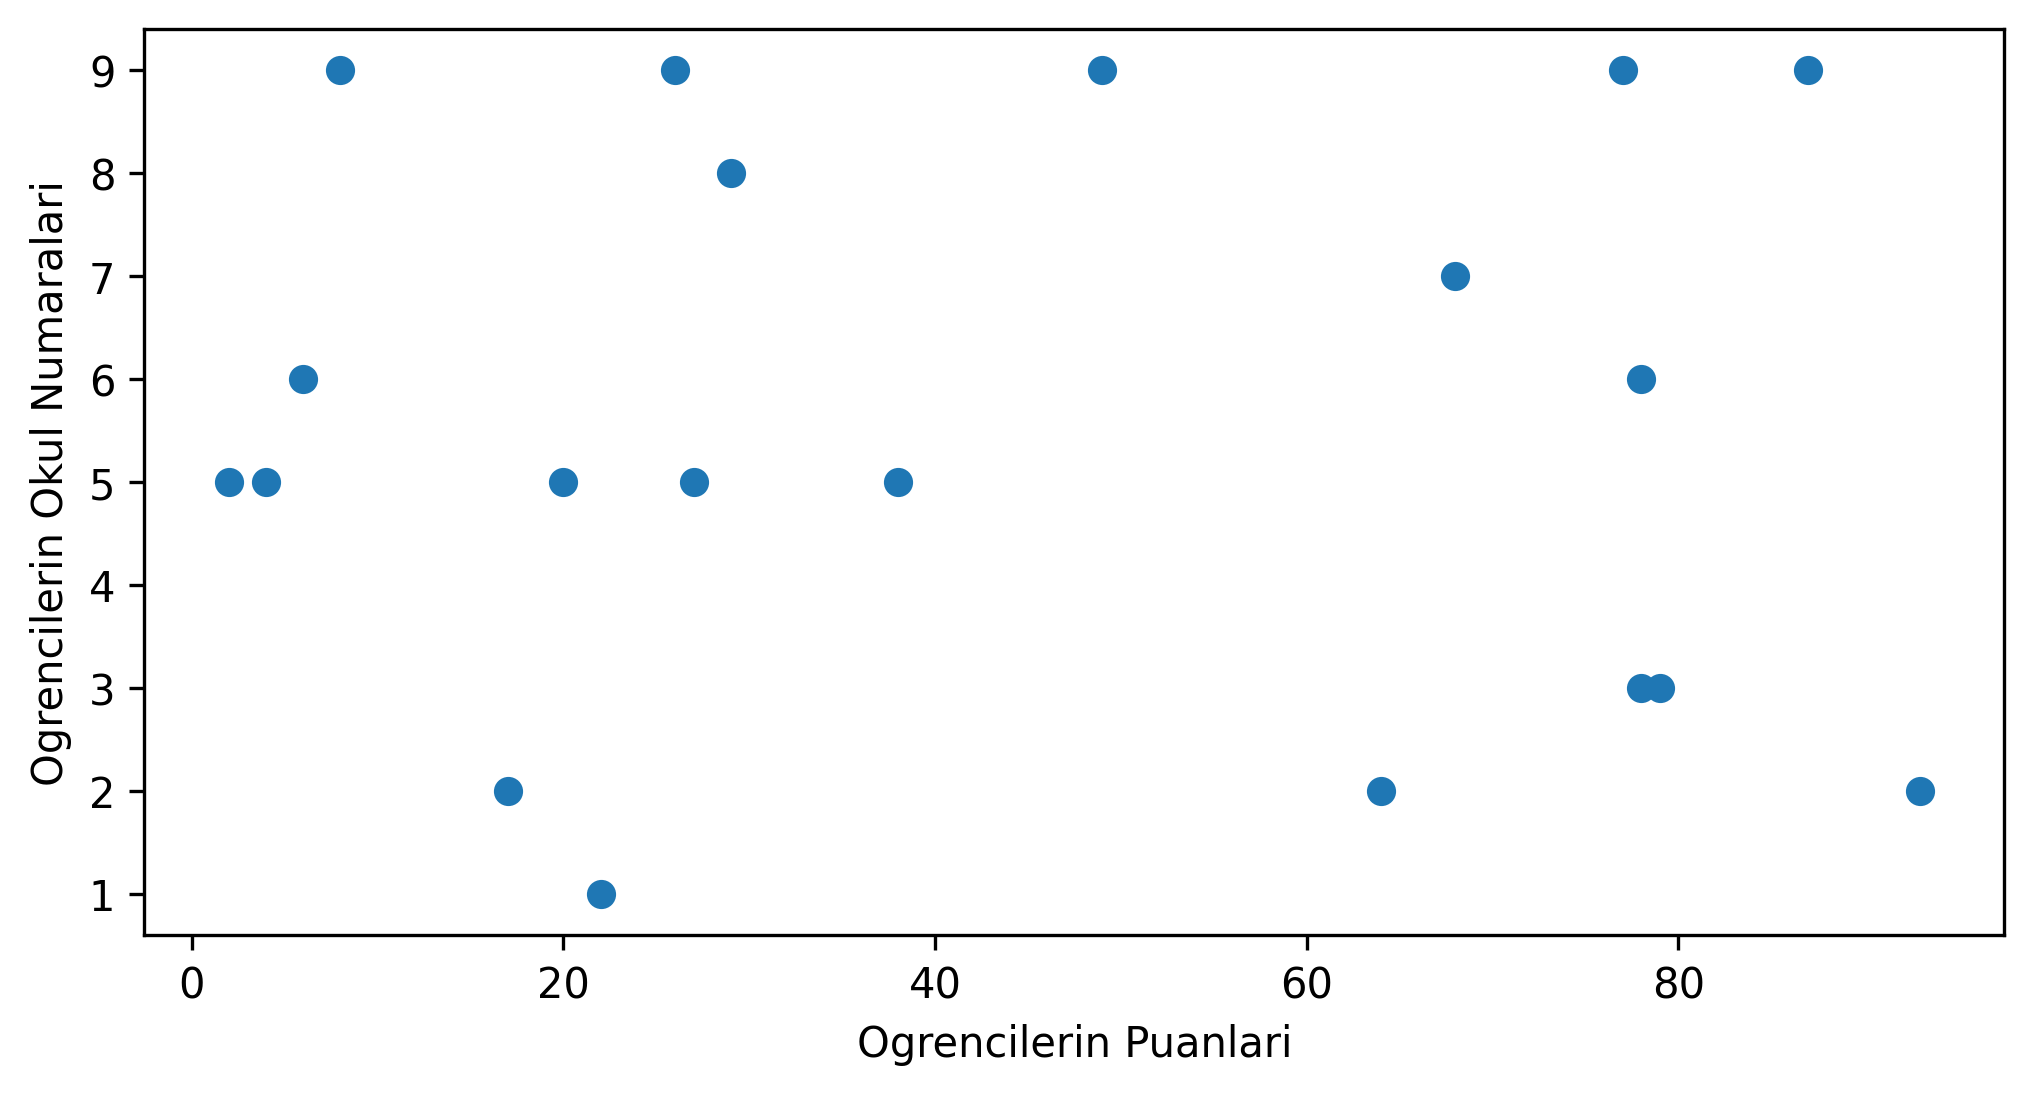

In [50]:
plt.figure(figsize=(8, 4), dpi=300)
plt.scatter(students_examp_score_array, number_of_students_array)
plt.xlabel('Ogrencilerin Puanlari')
plt.ylabel('Ogrencilerin Okul Numaralari')
plt.show()

In [51]:
class LinearRegression(nn.Module):
    def __init__(self, input_dimension, output_dimension): # 1D train ve test verisi veriyoruz
        super(LinearRegression, self).__init__() # super class(base class)'in constructor'ini kullanacagimizi belirtiyoruz
        self.linear = nn.Linear(input_dimension, output_dimension) # miras aldigimiz sinifin LinearRegression modeline gelend degerleri yolluyoruz
    
    def forward(self, x):
        return self.linear(x)

In [52]:
input_dimension = 1
output_dimension = 1

model = LinearRegression(input_dimension, output_dimension)

mse = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

### Gradient; Neural Network'de, loss function'un agirliklarina gore turevini ifade eder. Yani bir fonksiyonun belirli bir noktadaki egimi, oradaki degisim hizini ifade eder. Bu, agirliklari guncellemek ve modelin performansini iyilestirmek icin kullanilir.

In [53]:
iteraton_number = 1501
loss_list = []

for iteration in range(iteraton_number):
    optimizer.zero_grad() # pytorch gradyanları sakladığı için her seferinde 0'liyoruz.
    results = model(students_examp_score_tensor) # modelin tahmin edecegi verileri modele yollayalim model.forward(...) olarakda kullanilabilir
    loss = mse(results, number_of_students_tensor) # gercek degeler ile tahmin degerleri arasindaki MSE skorunu hesaplayalim
    loss_list.append(loss.data) # her hata degerini listemize ekleyelim
    loss.backward() # loss func'in model parametrelerine gore turevini hesaplatalim. Bu turevler gradient'lerdir.
    optimizer.step() # Gradient'i guncelleyelim(gradient descent). Optimizer, modelin parametrelerini gunceller.
    
    if iteration % 100 == 0:
        print(f'{iteration}. adimda ki loss degeri -> {loss.data:.5f}')

0. adimda ki loss degeri -> 1077.37292
100. adimda ki loss degeri -> 18.88083
200. adimda ki loss degeri -> 18.72604
300. adimda ki loss degeri -> 18.57327
400. adimda ki loss degeri -> 18.42250
500. adimda ki loss degeri -> 18.27371
600. adimda ki loss degeri -> 18.12685
700. adimda ki loss degeri -> 17.98192
800. adimda ki loss degeri -> 17.83888
900. adimda ki loss degeri -> 17.69771
1000. adimda ki loss degeri -> 17.55839
1100. adimda ki loss degeri -> 17.42089
1200. adimda ki loss degeri -> 17.28518
1300. adimda ki loss degeri -> 17.15125
1400. adimda ki loss degeri -> 17.01907
1500. adimda ki loss degeri -> 16.88862


In [54]:
predicted = model(students_examp_score_tensor).data.numpy()
for i in range(len(students_examp_score_array)):
    print('Tahmin: {0} --- Gercek: {1}'.format(predicted[i], students_examp_score_array[i]))

Tahmin: [2.521769] --- Gercek: [29.]
Tahmin: [0.34213644] --- Gercek: [2.]
Tahmin: [3.2483132] --- Gercek: [38.]
Tahmin: [0.8264992] --- Gercek: [8.]
Tahmin: [6.3966713] --- Gercek: [77.]
Tahmin: [6.5581255] --- Gercek: [79.]
Tahmin: [5.3472185] --- Gercek: [64.]
Tahmin: [7.2039423] --- Gercek: [87.]
Tahmin: [1.5530434] --- Gercek: [17.]
Tahmin: [1.7952248] --- Gercek: [20.]
Tahmin: [2.2795875] --- Gercek: [26.]
Tahmin: [0.66504496] --- Gercek: [6.]
Tahmin: [0.5035907] --- Gercek: [4.]
Tahmin: [4.1363115] --- Gercek: [49.]
Tahmin: [5.670127] --- Gercek: [68.]
Tahmin: [1.9566791] --- Gercek: [22.]
Tahmin: [6.4773984] --- Gercek: [78.]
Tahmin: [6.4773984] --- Gercek: [78.]
Tahmin: [2.3603146] --- Gercek: [27.]
Tahmin: [7.6883054] --- Gercek: [93.]


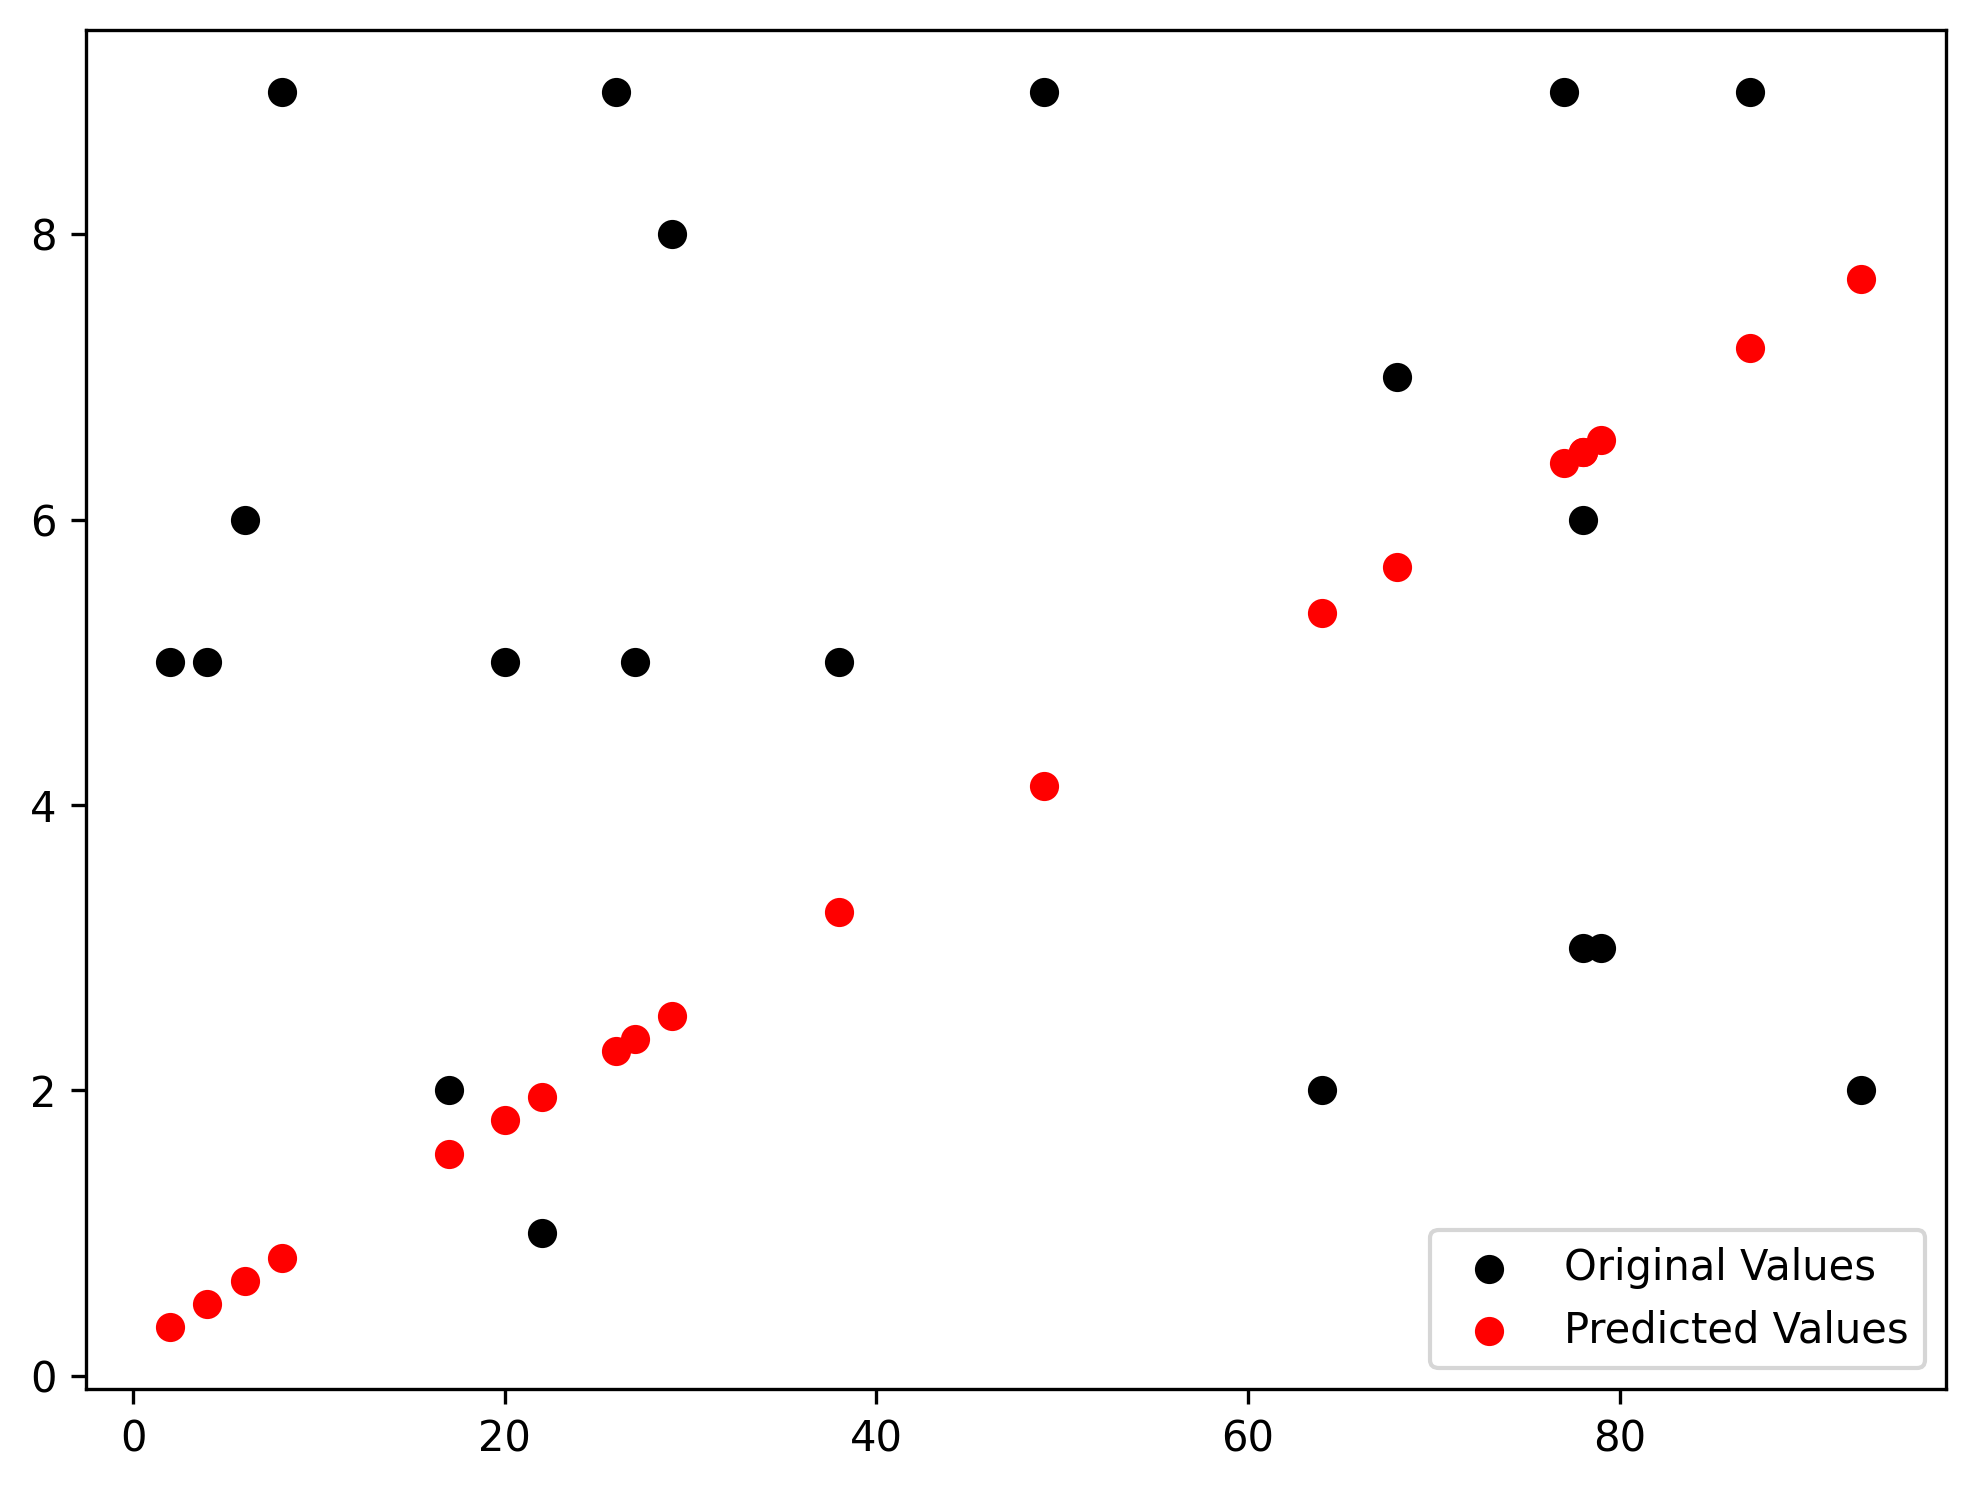

In [55]:
plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(students_examp_score_array, number_of_students_array, color='k', label='Original Values')
plt.scatter(students_examp_score_array, predicted, color='r', label='Predicted Values')
plt.legend()
plt.show()

In [56]:
model(Variable(torch.from_numpy(np.array(25, dtype=np.float32).reshape(-1, 1)))).data.numpy()

array([[2.1988604]], dtype=float32)